In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_toLoad = "data/mouse_drug_data.csv"
clinical_toLoad = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_toLoad)
clinical = pd.read_csv(clinical_toLoad)

# Combine the data into a single dataset
trials = pd.merge(mouse, clinical, on = "Mouse ID", how = "inner")

# Remove treatments other than Capomulin, Infubinol, Ketapril, and Placebo
trials = trials.loc[trials["Drug"].isin(["Capomulin", "Infubinol", "Ketapril", "Placebo"]), :]

# Display the data table for preview
trials.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
trialsGroups = trials.groupby(["Drug", "Timepoint"])
tumorMeans = trialsGroups["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumorMeans = pd.DataFrame(tumorMeans)

# Preview DataFrame
tumorMeans = tumorMeans.reset_index()
tumorMeans.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [11]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorErrors = trialsGroups["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumorErrors = pd.DataFrame(tumorErrors)

# Preview DataFrame
tumorErrors = tumorErrors.reset_index()
tumorErrors.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumorPivot = tumorMeans.pivot(index = "Timepoint",
                             columns = "Drug",
                             values = "Tumor Volume (mm3)")

# Preview that Reformatting worked
tumorPivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


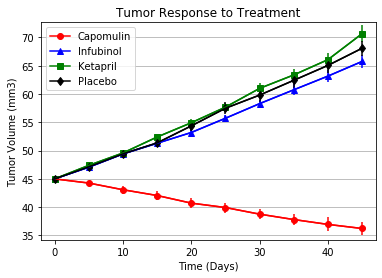

FileNotFoundError: [Errno 2] No such file or directory: 'images/TreatmentResponse.png'

<Figure size 432x288 with 0 Axes>

In [30]:
# Add error plots for each drug
plt.errorbar(tumorPivot.index, tumorPivot["Capomulin"], color = "red", 
             yerr = tumorErrors.loc[tumorErrors["Drug"] == "Capomulin"]["Tumor Volume (mm3)"])
plt.errorbar(tumorPivot.index, tumorPivot["Infubinol"], color = "blue", 
             yerr = tumorErrors.loc[tumorErrors["Drug"] == "Infubinol"]["Tumor Volume (mm3)"])
plt.errorbar(tumorPivot.index, tumorPivot["Ketapril"], color = "green", 
             yerr = tumorErrors.loc[tumorErrors["Drug"] == "Ketapril"]["Tumor Volume (mm3)"])
plt.errorbar(tumorPivot.index, tumorPivot["Placebo"], color = "black", 
             yerr = tumorErrors.loc[tumorErrors["Drug"] == "Placebo"]["Tumor Volume (mm3)"])

# Plot the line chart for each drug
capomulin, = plt.plot(tumorPivot.index, tumorPivot["Capomulin"], color = "red", label = "Capomulin", marker = "o")
infubinol, = plt.plot(tumorPivot.index, tumorPivot["Infubinol"], color = "blue", label = "Infubinol", marker = "^")
ketapril, = plt.plot(tumorPivot.index, tumorPivot["Ketapril"], color = "green", label = "Ketapril", marker = "s")
placebo, = plt.plot(tumorPivot.index, tumorPivot["Placebo"], color = "black", label = "Placebo", marker = "d")

# Add formatting to the chart
plt.grid(axis = "y")
plt.ylim(tumorMeans["Tumor Volume (mm3)"].min() - 2, tumorMeans["Tumor Volume (mm3)"].max() + 2)
plt.xlim(tumorMeans["Timepoint"].min() - 2, tumorMeans["Timepoint"].max() + 2)
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

# Create a legend for the chart
plt.legend(handles=[capomulin, infubinol, ketapril, placebo], loc="best")

# Display the plot
plt.show()

# Save the figure
#plt.savefig("images/TreatmentResponse.png")